<a href="https://colab.research.google.com/github/Siddhi-Takawade/Airplane-crashes-Data-visualization/blob/main/Airplane_crashes_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Visualization on airplane crashes dataset**

### **Source code**

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from datetime import date, timedelta, datetime

In [ ]:
Data = pd.read_csv('/content/Airplane_Crashes_and_Fatalities_Since_1908.csv')

In [ ]:
Data

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


In [ ]:
np.random.seed(30)
obs, feat = Data.shape
Data.sample(8)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
2720,02/02/1974,21:30,"Near Honolulu, HI",Pan American World Airways,NaN,"San Francisco, CA - Honolulu, HI - Agana, Guam",Boeing B-747,N732PA,19638/3,298.0,1.0,0.0,A 16 month old child was asphyxiated by a seat...
4791,07/12/2001,12:05,"Near Puerto Cabello, Venezuela",Private - OverteCompany,NaN,Puerto Cabello - Caracas,Antonov AN-28 PZL-MieleM-28 Sky Truck,YV-117CP,AJE 001-10,13.0,13.0,0.0,The aircraft crashed and burned moments after ...
3368,08/04/1982,04:10,"Concord, New Hampshire",Air Taxi,NaN,"Groton, CT - Concord, CT",Piper PA-28-161,N81786,NaN,2.0,2.0,0.0,Collided with trees on approach. Weather brief...
1992,08/04/1965,23:34,"Panama City, Panama",Rutas Internacionales Peruanes,NaN,Panama City - Miami,Douglas C-54D,OB-R-769,10826,7.0,7.0,0.0,The No. 2 engine of the cargo plane caught fir...
1019,08/19/1949,12:00,"Oldham, England",British European Airways,NaN,Belfast - Manchester,Douglas DC-3,G-AHCY,12355,24.0,24.0,0.0,"Crashed into a cloud shrouded 1,500 ft. mount..."
422,12/23/1936,NaN,"Near Dallas, Texas",Braniff Airways,NaN,Test flight,Lockheed 10 Electra,NC14905,1018,6.0,6.0,0.0,After an attempted go-around the right engine ...
4389,03/12/1996,NaN,"Karabogazgol Bay, Turkmenistan",Akhal Air,NaN,NaN,Mil Mi-8T (helicopter),EZ-22684,8142,12.0,12.0,0.0,Crashed into the sea while approaching an oil ...
149,07/24/1928,NaN,"Waalhaven harbor, Netherlands",KLM Royal Dutch Airlines,NaN,NaN,Fokker (KLM) F.III,H-NABR,1533 (KLM-1),1.0,1.0,0.0,The plane crashed into the Waalhaven harbor.


In [ ]:
obs , feat

(5268, 13)

In [ ]:
Data.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [ ]:
Data['Time'] = Data['Time'].replace(np.nan, '00:00') 
Data['Time'] = Data['Time'].str.replace('c: ', '')
Data['Time'] = Data['Time'].str.replace('c:', '')
Data['Time'] = Data['Time'].str.replace('c', '')
Data['Time'] = Data['Time'].str.replace('12\'20', '12:20')
Data['Time'] = Data['Time'].str.replace('18.40', '18:40')
Data['Time'] = Data['Time'].str.replace('0943', '09:43')
Data['Time'] = Data['Time'].str.replace('22\'08', '22:08')
Data['Time'] = Data['Time'].str.replace('114:20', '00:00') #is it 11:20 or 14:20 or smth else? 

Data['Time'] = Data['Date'] + ' ' + Data['Time'] #joining two rows
def todate(x):
    return datetime.strptime(x, '%m/%d/%Y %H:%M')
Data['Time'] = Data['Time'].apply(todate) #convert to date type
print('Date ranges from ' + str(Data.Time.min()) + ' to ' + str(Data.Time.max()))

Data.Operator = Data.Operator.str.upper()

Date ranges from 1908-09-17 17:18:00 to 2009-06-08 00:00:00


In [ ]:
Data

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,1908-09-17 17:18:00,"Fort Myer, Virginia",MILITARY - U.S. ARMY,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,1912-07-12 06:30:00,"AtlantiCity, New Jersey",MILITARY - U.S. NAVY,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,1913-08-06 00:00:00,"Victoria, British Columbia, Canada",PRIVATE,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,1913-09-09 18:30:00,Over the North Sea,MILITARY - GERMAN NAVY,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,1913-10-17 10:30:00,"Near Johannisthal, Germany",MILITARY - GERMAN NAVY,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,2009-05-20 06:30:00,"Near Madiun, Indonesia",MILITARY - INDONESIAN AIR FORCE,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,2009-05-26 00:00:00,"Near Isiro, DemocratiRepubliCongo",SERVICE AIR,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,2009-06-01 00:15:00,"AtlantiOcean, 570 miles northeast of Natal, Br...",AIR FRANCE,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,2009-06-07 08:30:00,"Near Port Hope Simpson, Newfoundland, Canada",STRAIT AIR,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


## **Crashes by year**

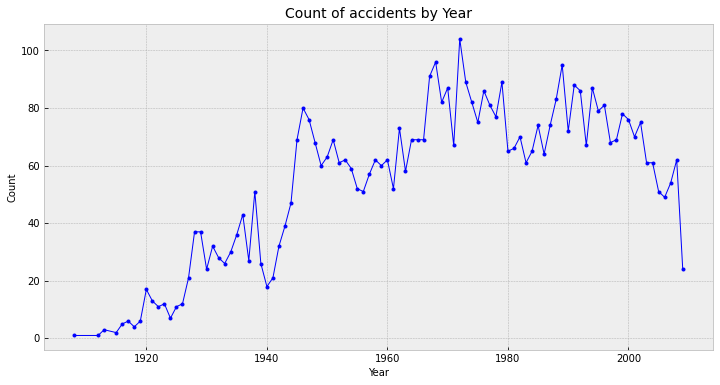

In [ ]:
Temp = Data.groupby(Data.Time.dt.year)[['Date']].count()  
Temp = Temp.rename(columns={"Date": "Count"})

plt.figure(figsize=(12,6))
plt.style.use('bmh')
plt.plot(Temp.index, 'Count', data=Temp, color='blue', marker = ".", linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Year', loc='Center', fontsize=14)
plt.show()

## **Yearly Fatalities**

In [ ]:
temp_data = Data.copy()
temp_data = temp_data.groupby(temp_data.Time.dt.date)[['Fatalities']].sum()
temp_data

,Fatalities
Time,
1908-09-17,1.0
1912-07-12,5.0
1913-08-06,1.0
1913-09-09,14.0
1913-10-17,30.0
...,...
2009-05-20,98.0
2009-05-26,4.0
2009-06-01,228.0


In [ ]:
# Creating a graph
fig = go.Figure()
fig.add_trace(go.Scatter(x=temp_data.index, y=temp_data.Fatalities))
fig.update_layout(title_text='No. of Fatalities in a year')

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                    label='1m',
                    step='month',
                    stepmode='backward'),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
    )
)

fig.show()



## **Total accidents by type of flight**

In [ ]:
Temp = Data.copy()
Temp['isMilitary'] = Temp.Operator.str.contains('MILITARY')
Temp = Temp.groupby('isMilitary')[['isMilitary']].count()
Temp.index = ['Passenger', 'Military']

Temp2 = Data.copy()
Temp2['Military'] = Temp2.Operator.str.contains('MILITARY')
Temp2['Passenger'] = Temp2.Military == False
Temp2 = Temp2.loc[:, ['Time', 'Military', 'Passenger']]
Temp2 = Temp2.groupby(Temp2.Time.dt.year)[['Military', 'Passenger']].aggregate(np.count_nonzero)


In [ ]:
fig2 = go.Figure(data=[go.Pie(labels=Temp.index, values=Temp.isMilitary, hole=.6, title='Total number of accidents by type of flight', titleposition= 'top center')])
fig2.show()

## **Yearly Military vs Passenger flight crashes**

In [ ]:
fig = px.scatter(Temp2, x="Military", y="Passenger", color= Temp2.index, title='Military vs Passenger (Count of accidents by year)')
fig.show()

## **Total count by Operator**

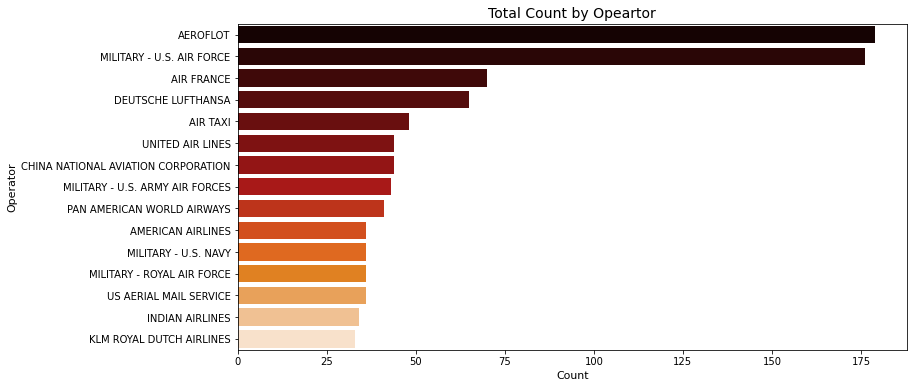

In [ ]:
Data.Operator = Data.Operator.str.upper()
Data.Operator = Data.Operator.replace('A B AEROTRANSPORT', 'AB AEROTRANSPORT')

Total_by_Op = Data.groupby('Operator')[['Operator']].count()
Total_by_Op = Total_by_Op.rename(columns={"Operator": "Count"})
Total_by_Op = Total_by_Op.sort_values(by='Count', ascending=False).head(15)

plt.figure(figsize=(12,6))
sns.barplot(y=Total_by_Op.index, x="Count", data=Total_by_Op, palette="gist_heat", orient='h')
plt.xlabel('Count', fontsize=11)
plt.ylabel('Operator', fontsize=11)
plt.title('Total Count by Opeartor', loc='Center', fontsize=14)
plt.show()

## **Total Fatalities by Operator**

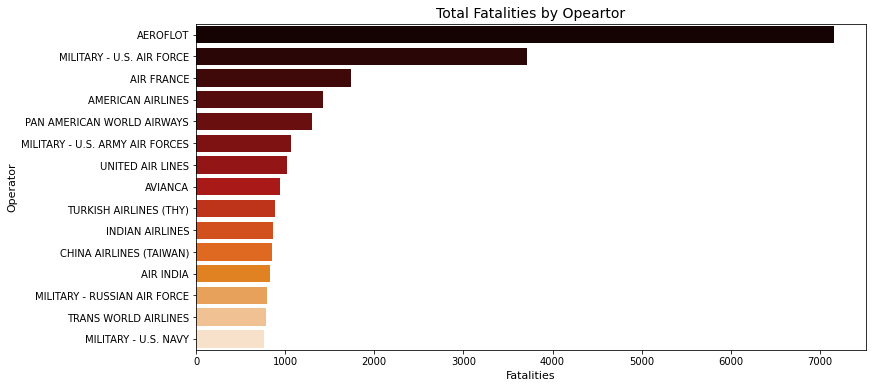

In [ ]:
Prop_by_Op = Data.groupby('Operator')[['Fatalities']].sum()
Prop_by_Op = Prop_by_Op.rename(columns={"Operator": "Fatalities"})
Prop_by_Op = Prop_by_Op.sort_values(by='Fatalities', ascending=False)
Prop_by_OpTOP = Prop_by_Op.head(15)

plt.figure(figsize=(12,6))
sns.barplot(y=Prop_by_OpTOP.index, x="Fatalities", data=Prop_by_OpTOP, palette="gist_heat", orient='h')
plt.xlabel('Fatalities', fontsize=11)
plt.ylabel('Operator', fontsize=11)
plt.title('Total Fatalities by Opeartor', loc='Center', fontsize=14)
plt.show()

## **Total crashes vs Fatalities vs Aboard Passengers**

In [ ]:
Data.Operator = Data.Operator.str.upper()
Data.Operator = Data.Operator.replace('A B AEROTRANSPORT', 'AB AEROTRANSPORT')

Total_by_Op = Data.groupby('Operator')[['Operator']].count()
Total_by_Op = Total_by_Op.rename(columns={"Operator": "Count"})
Total_by_Op = Total_by_Op.sort_values(by='Count', ascending=False)
Total_by_OpTOP = Total_by_Op.head(15)

Prop_by_Op = Data.groupby('Operator')[['Fatalities']].sum()
Prop_by_Op = Prop_by_Op.rename(columns={"Operator": "Fatalities"})
Prop_by_Op = Prop_by_Op.sort_values(by='Fatalities', ascending=False)
Prop_by_OpTOP = Prop_by_Op.head(15)

aboard_by_Op = Data.groupby('Operator')[['Aboard']].sum()
aboard_by_Op = aboard_by_Op.rename(columns={"Operator": "Aboard"})
aboard_by_Op = aboard_by_Op.sort_values(by='Aboard', ascending=False)
aboard_by_OpTOP = aboard_by_Op.head(15)

xdata = 7 * Total_by_Op['Count']
ydata = np.sin(xdata) + 0.25 * Prop_by_Op['Fatalities']
zdata = np.cos(xdata) + 0.25 * aboard_by_Op['Aboard']


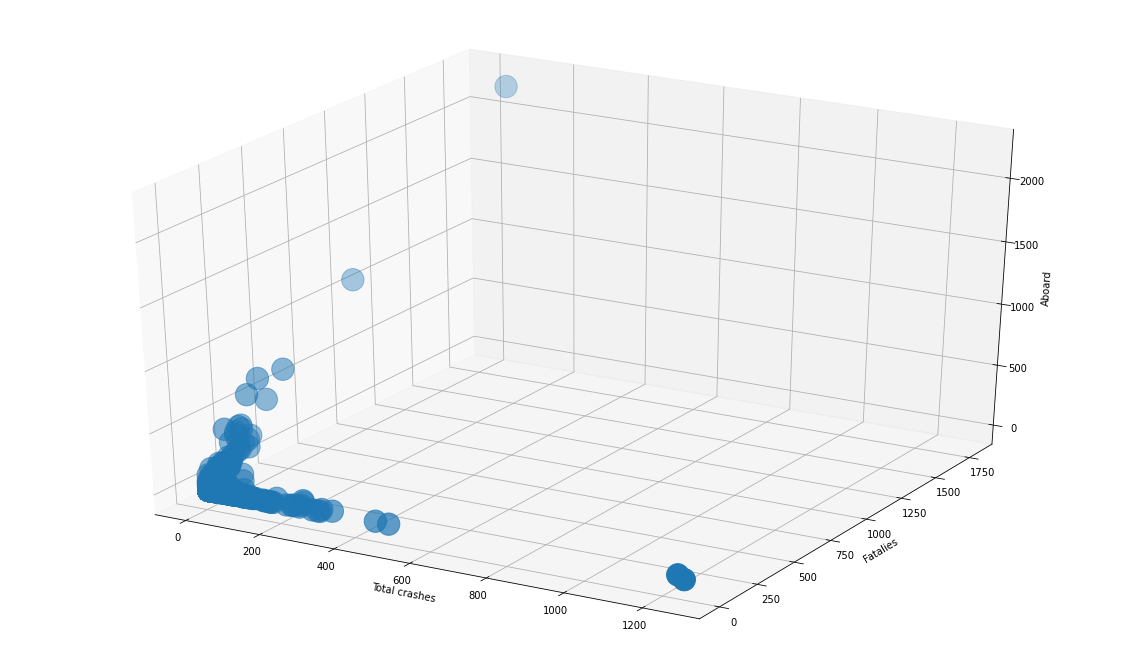

In [ ]:
fig = plt.figure(figsize=(20, 12))
# Create 3D container
ax = plt.axes(projection = '3d')
# Visualize 3D scatter plot
ax.scatter3D(xdata, ydata, zdata, s = 500)
# Give labels
ax.set_xlabel('Total crashes')
ax.set_ylabel('Fatalies')
ax.set_zlabel('Aboard')
plt.show()

## **Count of Accidents - Monthly, Weekly and Hourly**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



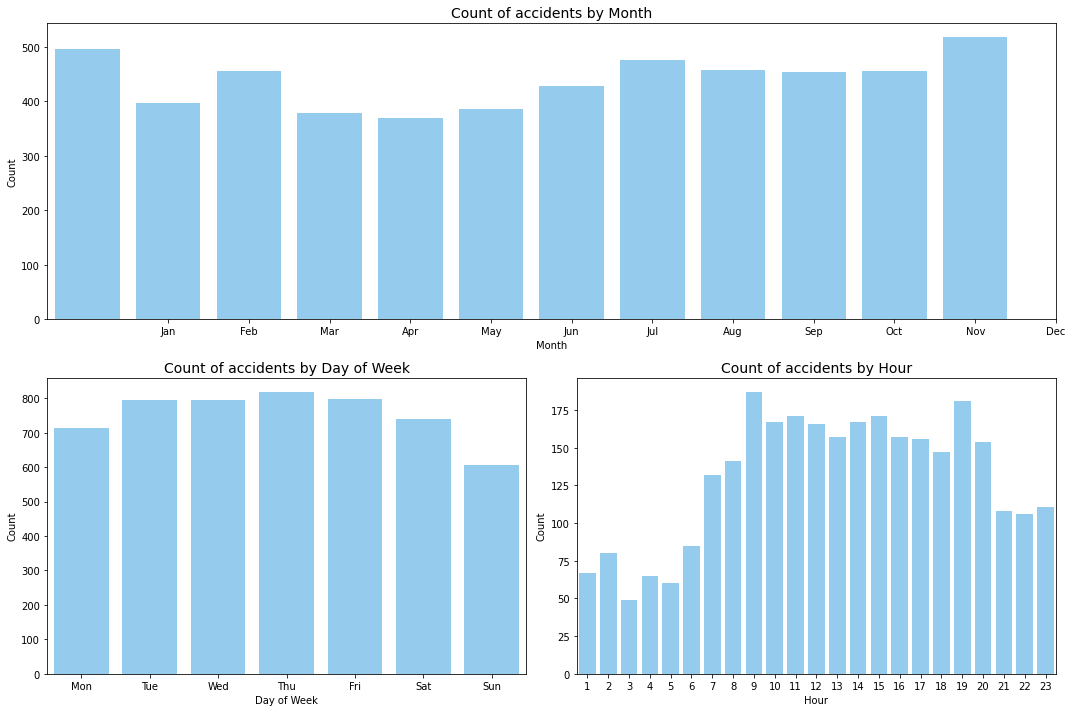

In [ ]:
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(2, 2)
pl.figure(figsize=(15,10))
plt.style.use('seaborn-muted')
ax = pl.subplot(gs[0, :]) # row 0, col 0
sns.barplot(Data.groupby(Data.Time.dt.month)[['Date']].count().index, 'Date', data=Data.groupby(Data.Time.dt.month)[['Date']].count(), color='lightskyblue', linewidth=2)
plt.xticks(Data.groupby(Data.Time.dt.month)[['Date']].count().index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Month', loc='Center', fontsize=14)

ax = pl.subplot(gs[1, 0])
sns.barplot(Data.groupby(Data.Time.dt.weekday)[['Date']].count().index, 'Date', data=Data.groupby(Data.Time.dt.weekday)[['Date']].count(), color='lightskyblue', linewidth=2)
plt.xticks(Data.groupby(Data.Time.dt.weekday)[['Date']].count().index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of Week', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Day of Week', loc='Center', fontsize=14)

ax = pl.subplot(gs[1, 1])
sns.barplot(Data[Data.Time.dt.hour != 0].groupby(Data.Time.dt.hour)[['Date']].count().index, 'Date', data=Data[Data.Time.dt.hour != 0].groupby(Data.Time.dt.hour)[['Date']].count(),color ='lightskyblue', linewidth=2)
plt.xlabel('Hour', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Hour', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()

## **WordCloud for Crash Locations**

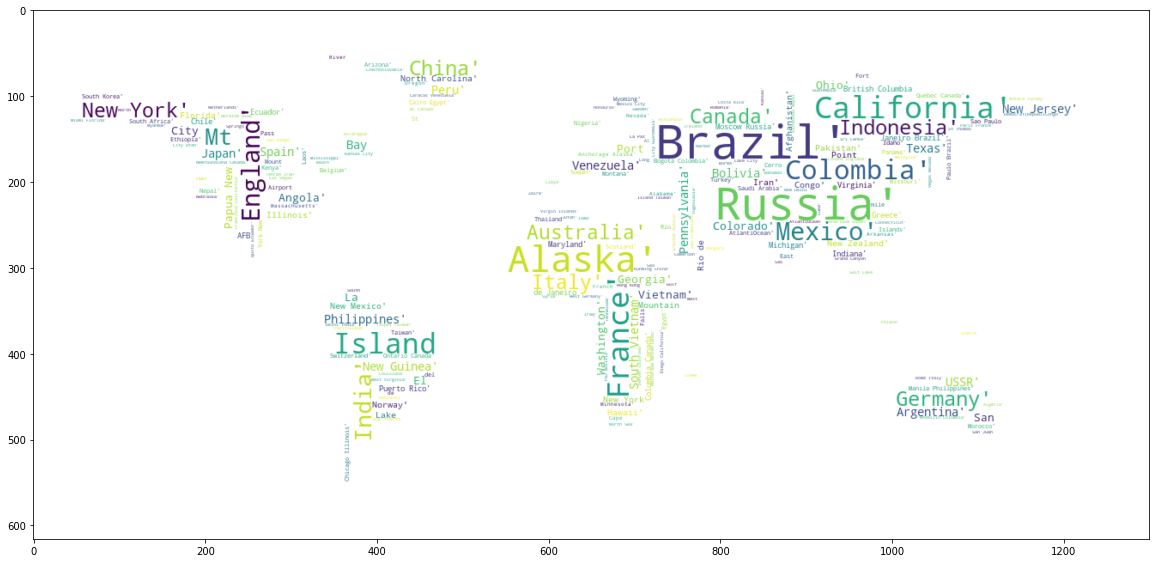

In [ ]:
textloc = str(Data.Location.to_list()) # get all the words in a list

img2 = np.array(Image.open('world.jpg'))

words = STOPWORDS.add('Near')
words = STOPWORDS.add(',') 

wc2 = WordCloud(background_color='white', max_words=2000, stopwords=words, mask = img2)
wc2.generate(textloc)

plt.figure(figsize=(20, 20))
plt.imshow(wc2, interpolation='bilinear')
plt.show()

## **WordCloud for Crash Descriptions**

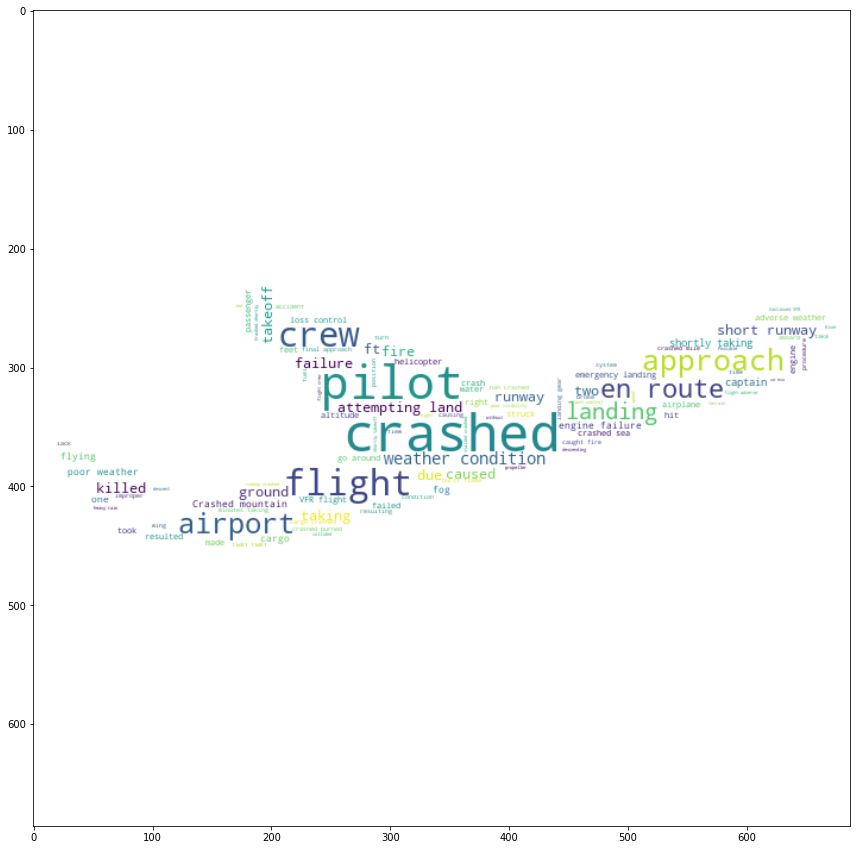

In [ ]:
text = str(Data.Summary.to_list()) # get all the words in a list


words = STOPWORDS.add('aircraft') # adding some extra words
words = STOPWORDS.add('plane')    # adding some extra words

img = np.array(Image.open('plane_bg.png'))

wc = WordCloud(background_color='white', max_words=2000, stopwords=words, mask=img)
wc.generate(text)

plt.figure(figsize=(20, 15))
plt.imshow(wc, interpolation='bilinear')
plt.show()

## **Total number of people involved in a year**

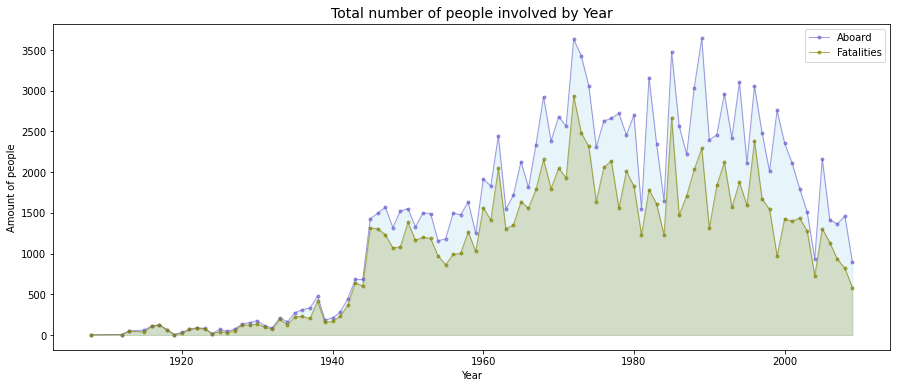

In [ ]:
Fatalities = Data.groupby(Data.Time.dt.year).sum()
Fatalities['Proportion'] = Fatalities['Fatalities'] / Fatalities['Aboard']

plt.figure(figsize=(15,6))
plt.fill_between(Fatalities.index, 'Aboard', data=Fatalities, color="skyblue", alpha=0.2)
plt.plot(Fatalities.index, 'Aboard', data=Fatalities, marker = ".", color="Slateblue", alpha=0.6, linewidth=1)
plt.fill_between(Fatalities.index, 'Fatalities', data=Fatalities, color="olive", alpha=0.2)
plt.plot(Fatalities.index, 'Fatalities', data=Fatalities, color="olive", marker = ".", alpha=0.6, linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Amount of people', fontsize=10)
plt.title('Total number of people involved by Year', loc='Center', fontsize=14)
plt.show()